# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [11]:
data.corr().sort_values(by = 'Class')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V14,0.118929,-0.131330,0.234591,-0.168131,0.124855,0.061595,0.231304,-0.032576,0.152764,0.284523,...,-0.039929,-0.079960,0.007707,-0.004701,0.018347,-0.006217,-0.011792,-0.049737,-0.001607,-0.571421
V17,0.172363,-0.152735,0.276084,-0.173920,0.195050,0.062933,0.310943,-0.063498,0.169045,0.326161,...,-0.042385,-0.054479,-0.010688,-0.016404,0.002787,0.000197,-0.003789,-0.015372,0.001016,-0.549825
V12,0.136704,-0.132410,0.233948,-0.167636,0.129675,0.059193,0.244737,-0.034087,0.130675,0.275749,...,-0.030567,-0.036249,-0.005370,-0.004147,0.012537,0.003031,-0.015733,-0.030469,-0.009388,-0.506636
V10,0.163211,-0.136513,0.250415,-0.142944,0.146717,0.054229,0.243324,-0.004709,0.109749,1.000000,...,-0.019257,0.005864,-0.023205,-0.015780,0.010106,0.002799,0.001433,0.010375,0.029260,-0.441419
V16,0.127268,-0.100532,0.195625,-0.137204,0.128226,0.045510,0.216207,-0.020820,0.110254,0.235882,...,-0.001277,-0.038804,-0.001506,-0.017037,-0.000799,0.002365,-0.012768,-0.026262,-0.016355,-0.410511
V3,0.163547,-0.168389,1.000000,-0.132964,0.178195,0.050228,0.269471,-0.041581,0.125052,0.250415,...,-0.046755,-0.031438,0.006083,-0.001562,0.008052,-0.009167,-0.006336,-0.004618,0.017944,-0.404299
V7,0.200443,-0.154898,0.269471,-0.146943,0.180761,0.042292,1.000000,0.026257,0.120892,0.243324,...,-0.015847,-0.036292,0.000570,-0.015004,-0.000209,-0.015047,-0.005232,0.025076,0.000575,-0.387461
V18,0.088680,-0.080657,0.135928,-0.090144,0.103696,0.024234,0.147685,-0.023343,0.078509,0.167874,...,-0.039890,-0.033987,-0.004563,-0.016250,0.006565,0.001525,0.004390,-0.007277,0.001874,-0.250407
V1,1.000000,-0.201825,0.163547,-0.069693,0.157502,0.001112,0.200443,-0.020877,0.086285,0.163211,...,-0.074624,-0.048482,0.011011,0.039224,0.001055,0.007906,0.007325,0.014890,0.022776,-0.241863
V9,0.086285,-0.061759,0.125052,-0.082091,0.071119,0.032544,0.120892,-0.015805,1.000000,0.109749,...,-0.018130,0.017662,-0.015938,-0.007020,0.003328,-0.004485,-0.009288,0.010659,-0.008113,-0.221992


<AxesSubplot:>

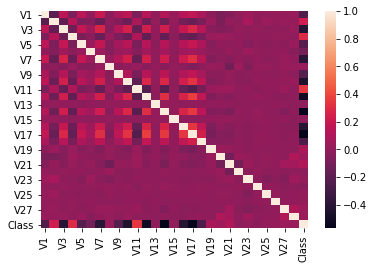

In [5]:
sns.heatmap(data = data.corr())

-> 각 변수들이 낮은 상관관계를 갖고 있다.

In [14]:
# target 변수 설정
target = data['Class']
data = data.drop('Class', axis=1)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,0.137028,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,0.643614,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,0.104002,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.057182,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test , y_train, y_test  = train_test_split(data, target, random_state = 2021)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508,) (7170,)


In [17]:
# LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [19]:
pred = classifier.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
classifier.score(X_test, y_test)


0.998047419804742

In [34]:
classifier.predict_proba(X_test)

array([[9.99641214e-01, 3.58785833e-04],
       [9.98469748e-01, 1.53025166e-03],
       [9.96019201e-01, 3.98079879e-03],
       ...,
       [9.99492954e-01, 5.07046310e-04],
       [9.99566842e-01, 4.33158144e-04],
       [9.99449245e-01, 5.50754840e-04]])

In [23]:
prob = [prob[1] for prob in classifier.predict_proba(X_test)] # class 1에 속할 확률 
prob

[0.0003587858325116932,
 0.0015302516606767011,
 0.003980798789048856,
 0.0008041034157686743,
 0.003053751703273706,
 6.25271239432758e-05,
 0.0016979405769089264,
 0.00025916920504630606,
 0.0011905545482567665,
 0.000800616751241387,
 0.0013978756569216668,
 0.00029369105127303086,
 0.0006074709678046855,
 0.9877118259987578,
 0.0021939713038692963,
 6.468518773122635e-05,
 0.002293209032700822,
 0.00013654047189977294,
 0.001932388926493488,
 8.462260539615285e-05,
 1.932497213423721e-05,
 0.001221585140214577,
 0.0012631412694223073,
 0.0005664140610147441,
 0.0007323347109278584,
 0.0012826216214117839,
 0.0018848462541246809,
 0.000161482066820058,
 0.00039015363325816836,
 0.000434594479311318,
 0.002932127602931559,
 0.0004491603105199844,
 0.00010217432729271082,
 0.0013701754215338785,
 0.002103889109368086,
 0.0003052998515741199,
 0.0003776332499843787,
 0.00031636377192907205,
 0.0008599085792944146,
 0.00020682725590728145,
 0.0010457041923774546,
 0.00014634241415786045

In [39]:
yi = y_test.to_numpy()
pi =  np.array(prob)

In [46]:
# cross entropy 
-np.sum((yi * np.log(pi) + (1-yi) * np.log(1-pi))/len(yi)) 

0.011862281849882642

In [49]:
from sklearn.metrics import *

# f1 score
f1_score(pred, y_test) 


0.898550724637681

In [51]:
confusion_matrix(y_test,pred)

array([[7094,    1],
       [  13,   62]], dtype=int64)

True Positive (TP) 
- The predicted value matches the actual value
- The actual value was positive and the model predicted a positive value


True Negative (TN) 
- The predicted value matches the actual value
- The actual value was negative and the model predicted a negative value

False Positive (FP) – Type 1 error
- The predicted value was falsely predicted
- The actual value was negative but the model predicted a positive value
- Also known as the Type 1 error

False Negative (FN) – Type 2 error
- The predicted value was falsely predicted
- The actual value was positive but the model predicted a negative value
- Also known as the Type 2 error

In [68]:
tp, fn, fp, tn = confusion_matrix(y_test, pred, labels = [1,0]).reshape(-1)
print(tp, fn, fp, tn)

62 13 1 7094


In [69]:
#Accuracy : 정확도

accuracy = (tp+tn)/(tp+fn+fp+tn)
print("Accuracy : ",accuracy)

Accuracy :  0.998047419804742


In [70]:
#Precision : 정밀도

precision = tp / (tp+fp)
print("Precision : ",precision)

Precision :  0.9841269841269841


In [71]:
# Recall(=sensitivity) : 재현율

recall = tp/(tp+fn)
print("Recall(+sensitivity) : ",recall)

Recall(+sensitivity) :  0.8266666666666667


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=['otherwise', 'fraudulent transactions']))

                         precision    recall  f1-score   support

              otherwise       1.00      1.00      1.00      7095
fraudulent transactions       0.98      0.83      0.90        75

               accuracy                           1.00      7170
              macro avg       0.99      0.91      0.95      7170
           weighted avg       1.00      1.00      1.00      7170



In [72]:
# F1_score : recall과 precision의 조화평균
f1 = f1_score(pred, y_test)
print("f1 : ", f1)

f1 :  0.898550724637681


In [82]:
#ROC Curve 그리기

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]


In [83]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, prob)

In [86]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob)

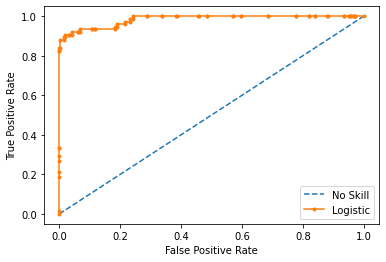

In [87]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()